# A Quick Start of NimbusML - Regression

In this example, we solve a regression problem using synthetic data. Each data sample has three features, x<sub>1</sub>, x<sub>2</sub> and x<sub>3</sub>. However, we set x<sub>2</sub>=x<sub>1</sub><sup>2</sup> and x<sub>3</sub> = x<sub>1</sub><sup>3</sup>. We use nimbusml's OrdinaryLeastSquaresRegressor, OnlineGradientDescentRegressor, FastLinearRegressor and sklearn's linear regression as the learners. The OrdinaryLeastSquaresRegressor is similar to the traditional ordinary least square, but it enables to add the L2 regularization (Ridge regression). OnlineGradientDescentRegressor is the online gradient descent perceptron algorithm. In nimbusml, it allows for L2 regularization and multiple loss functions. 

After generating the random data, we can see that we can train and test the nimbusml models in a very similar way as sklearn.

In [1]:
import numpy as np
from math import sqrt
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display,IFrame,Image, HTML
from nimbusml.linear_model import FastLinearRegressor, OnlineGradientDescentRegressor, \
                                            OrdinaryLeastSquaresRegressor
from sklearn.linear_model import LinearRegression as sklearn_linearregression
from sklearn.metrics import mean_squared_error

We develop two helper functions: one for generating the synthetic data, and one for visualizing the prediction results.

In [2]:
def gen_data(N):
    x1 = np.random.rand(N)
    x2 = x1 * x1
    x3 = x2 * x1
    x4 = x3 * x1
    y = -4 + 40 * x1 - 130 * x1 * x1 + 100 * x1 * x1 * x1  + (np.random.normal(0,1,N))    
    data = pd.DataFrame({"X1":x1,"X2":x2,"X3":x3,"Y":y}).sample(frac=1)
    data = data.reset_index(drop=True)
    return data.iloc[0:int(N * 0.99),0:3], data.iloc[0:int(N * 0.99),3],\
           data.iloc[int(N * 0.99):,0:3], data.iloc[int(N * 0.99):, 3]

def plot_result(data, label, predict, name, position):
    plt.subplot(position)
    data2 = data.copy()
    plt.scatter(data2["X1"], label, label = 'data', s = 1)
    data2["predict"] = np.array(predict)
    data2 = data2.sort_values(["X1"])
    plt.plot(data2["X1"], data2["predict"], color = 'orange', label = name)
    plt.legend()

## Introduction

In this example, we generate input data randomly with three features, x<sub>1</sub>, x<sub>2</sub> and x<sub>3</sub>. Our goal is to train a regression model that takes the input of the features and gives a prediction of the dependent variable, y. More specifically, we are training a linear model meaning that we expect that the conditional expectation of y is a linear combination of the given feautures, i.e. x<sub>1</sub>, x<sub>2</sub> and x<sub>3</sub>.

<img src="images/1-3-1.png" align = "middle"/>

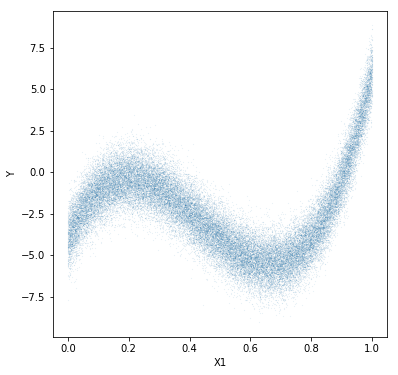

In [3]:
# Loading data
np.random.seed(0)
dataTrain, labelTrain, dataTest, labelTest = gen_data(50000)
plt.figure(figsize=(6,6))
plt.scatter(dataTrain["X1"], labelTrain, s = 0.001)
plt.xlabel("X1")
plt.ylabel("Y")
plt.show();

### NimbusML Learners

**OrdinaryLeastSquaresRegressor**
The nimbusml OrdinaryLeastSquaresRegressor is equivalent to the Ridge Regression that minimizes the total loss, which is a function of the sum of squared errors and the regularization term for the coefficients. Compared to traditional ordinary least square regression, adding the regularization term reduces the variance of the coefficients' estimation, increases model stability, and increases prediction accuracy/generalization.

**OnlineGradientDescentRegressor**
NimbusML implements the online version of the linear regression, i.e. perceptron algorithm. The coefficients are estimated/updated using online learning regime. The method also allows for L2 regularization and various loss functions, e.g. HingeLoss, etc..

**FastLinearRegressor**
The Fast Linear Regression learner trains a linear regression model through the implementation of the state-of-the-art optimizer, Stochastic Dual Coordinate Ascent (SDCA). Instead of solving the minimization problem of the original loss function, SDCA solves the dual problem, and as long as reaches the duality gap, the algorithm terminates. Compared with the traditional Stochastic Gradient Descent (SGD), SDCA converges faster in many cases and has clear termination rule (http://www.jmlr.org/papers/volume14/shalev-shwartz13a/shalev-shwartz13a.pdf).

## Training Model

In nimbusml, the FastTreeClassifier is implemented as a binary classifier.

In [4]:
flr = FastLinearRegressor(bias_learning_rate=3.0)
sgd = OnlineGradientDescentRegressor(learning_rate=2)
ls = OrdinaryLeastSquaresRegressor()
sk_ls = sklearn_linearregression()

flr.fit(dataTrain,labelTrain)
sgd.fit(dataTrain,labelTrain)
ls.fit(dataTrain,labelTrain)
sk_ls.fit(dataTrain,labelTrain);

## Testing Model

We evaluate the prediction accuracy (percentage of the samples that have the correct predicted class) on the test dataset.

In [5]:
result_flr = flr.predict(dataTest)
result_sgd = sgd.predict(dataTest)
result_ls = ls.predict(dataTest)
result_sk_ls = sk_ls.predict(dataTest)
print("RMSE for FastLinearRegressor: " + str(round(sqrt(mean_squared_error(result_flr, labelTest)),2)))
print("RMSE for OnlineGradientDescentRegressor: " + str(round(sqrt(mean_squared_error(result_sgd, labelTest)),2)))
print("RMSE for OrdinaryLeastSquaresRegressor: " + str(round(sqrt(mean_squared_error(result_ls, labelTest)),2)))
print("RMSE for sklearn_linearregression: " + str(round(sqrt(mean_squared_error(result_sk_ls, labelTest)),2)))

RMSE for FastLinearRegressor: 1.16
RMSE for OnlineGradientDescentRegressor: 1.79
RMSE for OrdinaryLeastSquaresRegressor: 1.01
RMSE for sklearn_linearregression: 1.01


The decision boundary is shown in the following figure for the ensembled FastTree algorithm.

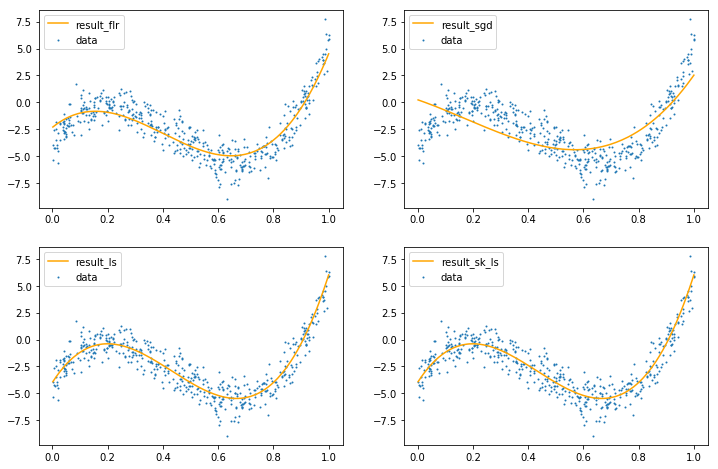

In [6]:
plt.figure(figsize=(12,8))
plot_result(dataTest, labelTest, result_flr, "result_flr", 221)
plot_result(dataTest, labelTest, result_sgd, "result_sgd", 222)
plot_result(dataTest, labelTest, result_ls, "result_ls", 223)
plot_result(dataTest, labelTest, result_sk_ls, "result_sk_ls", 224)
plt.show();

## Discussion

The OrdinaryLeastSquare algorithms solve directly the optimal set of parameters. For relatively small datasets, those are usually sufficient. However, with large datasets, an online learning algorithm will be preferred, such as the FastLinearRegressor or OnlineGradientDescentRegressor. The FastLinearRegressor, in most cases, converges faster than the OnlineGradientDescentRegressor. But with sufficient amount of data, both algorithms converge well.

Other than OrdinaryLeastSquaresRegressor, OnlineGradientDescentRegressor and FastLinearRegressor, nimbusml implements many other state-of-art algorithms. Users can explore more and refer to the original documents on (url to be added)